https://www.geeksforgeeks.org/automatic-license-number-plate-recognition-system/

https://github.com/arnaucampru/Automatic-License-Plate-Recognition/blob/main/codi_final.ipynb

https://pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/

#### Loading the libraries

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Loading the image as grayscale

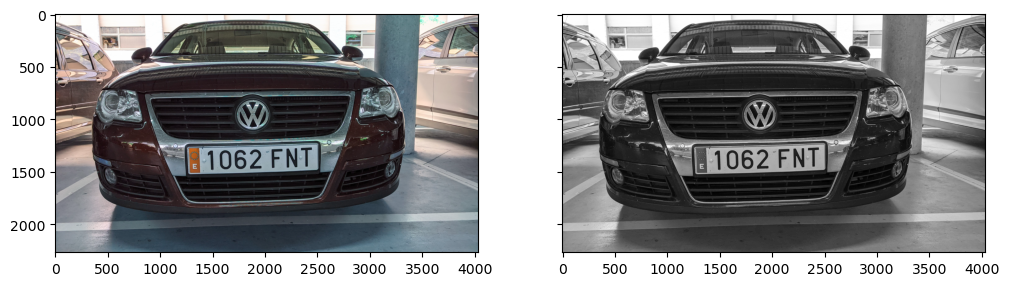

In [68]:
image_path = "C:/Users/ainav/OneDrive/Documents/Uni/3rd_year/1st_semester/vision&learning/challenge1/Licence-Plates-Challenge/Test/Test/Frontal/Frontal/1062FNT.jpg"
im = cv2.imread(image_path)
HASAN_KARAN_TRANSFORMATION_COEFFS = [0.114, 0.587, 0.299] #Special Grayscale Transformation
m = np.array(HASAN_KARAN_TRANSFORMATION_COEFFS).reshape((1,3))
grayscale_image = cv2.transform(im, m)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(im)
ax2.imshow(grayscale_image, cmap= 'gray')

#### Blurring the image

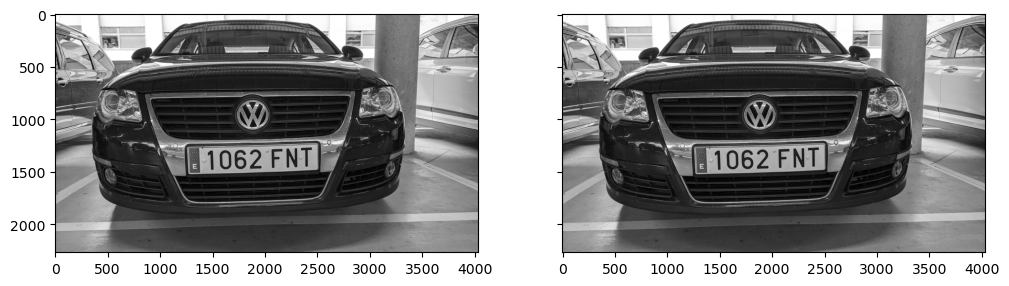

In [69]:
median_image = cv2.medianBlur(grayscale_image, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayscale_image, cmap= 'gray')
ax2.imshow(median_image, cmap= 'gray')

#### Applying blackhat operation

Better for knowing the number on the plate

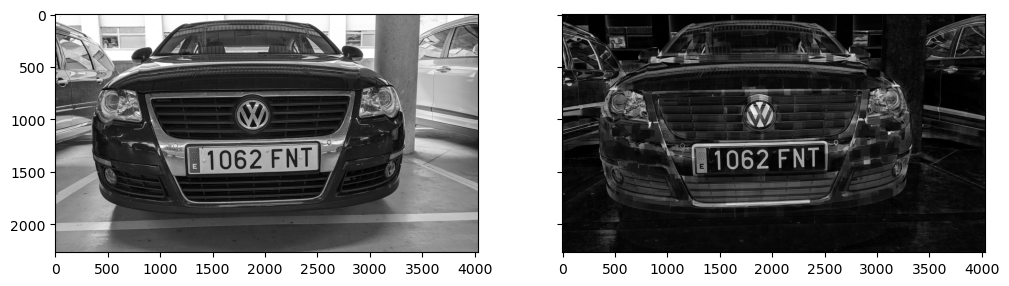

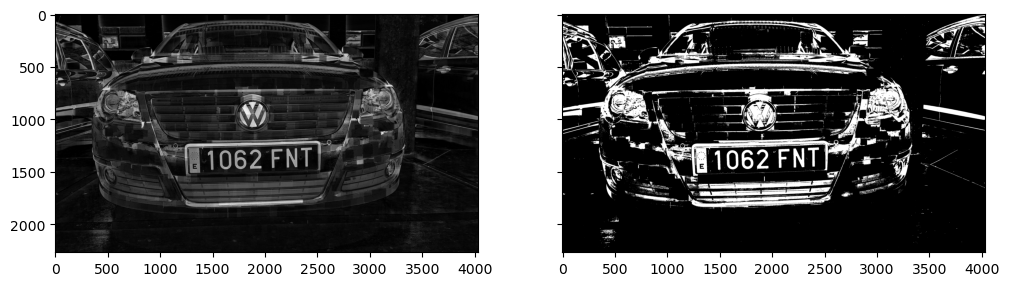

In [79]:
kernel_blackhat = cv2.getStructuringElement(cv2.MORPH_RECT, (60, 60))
blackhat_im = cv2.morphologyEx(grayscale_image, cv2.MORPH_BLACKHAT, kernel_blackhat)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayscale_image,  cmap = 'gray')
ax2.imshow(blackhat_im, cmap = 'gray')

ret2,binary_blackhat = cv2.threshold(blackhat_im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(binary_blackhat, cmap= 'gray')

#### Applying whitehat operation

Better for localizing the plate

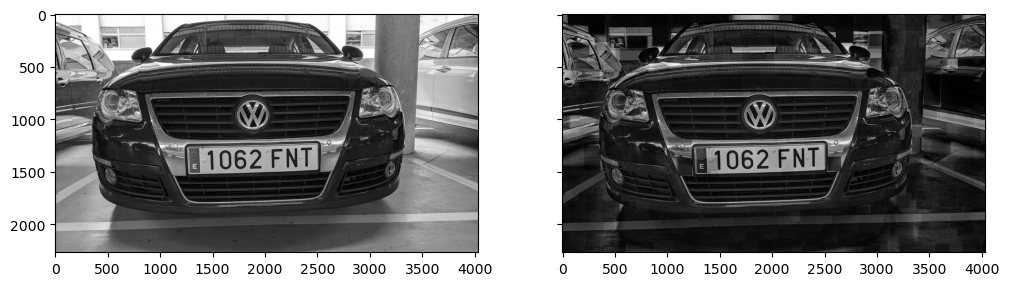

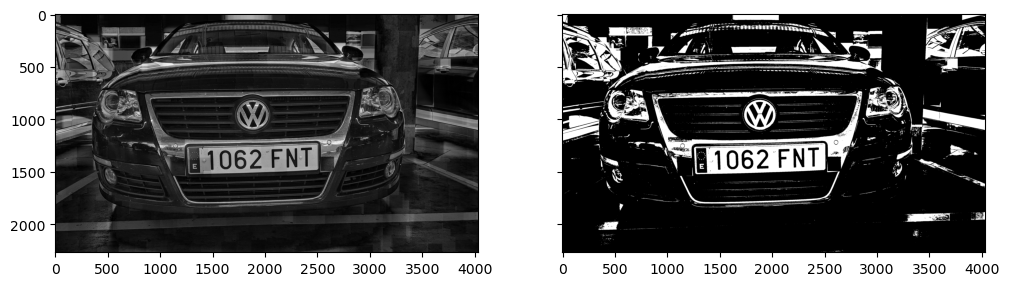

In [78]:
kernel_whitehat = cv2.getStructuringElement(cv2.MORPH_RECT, (120, 120))

whitehat_im = cv2.morphologyEx(grayscale_image, cv2.MORPH_TOPHAT, kernel_whitehat)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(grayscale_image,  cmap = 'gray')
ax2.imshow(whitehat_im, cmap = 'gray')

ret2,binary_whitehat = cv2.threshold(whitehat_im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(whitehat_im, cmap= 'gray')
ax2.imshow(binary_whitehat, cmap= 'gray')

#### Doing some operations on blackat image

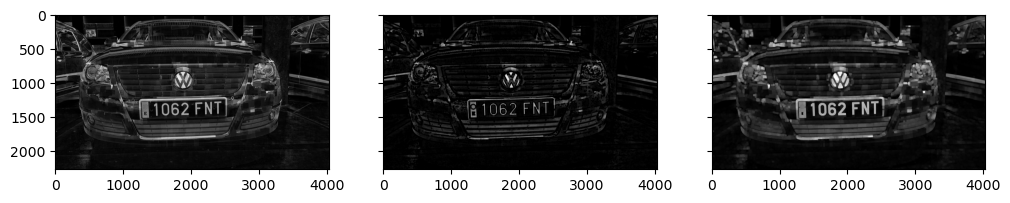

In [38]:
# Define kernel size
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply morphological operations
image_eroded = cv2.erode(blackhat_im, kernel, iterations=3)
image_dilated = cv2.dilate(image_eroded, kernel, iterations=5)

# Display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(blackhat_im, cmap= 'gray')
ax2.imshow(image_eroded, cmap= 'gray')
ax3.imshow(image_dilated, cmap= 'gray')

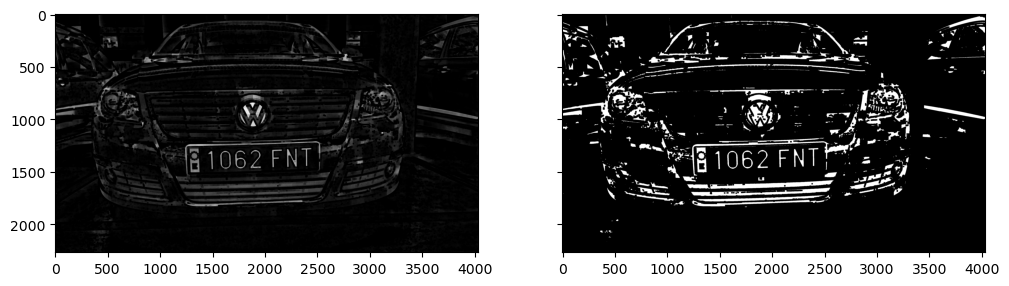

In [62]:
# BINARIZE ERODED IMAGE

ret2,binary_eroded = cv2.threshold(image_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(binary_eroded, cmap= 'gray')

##### operations with dilated image

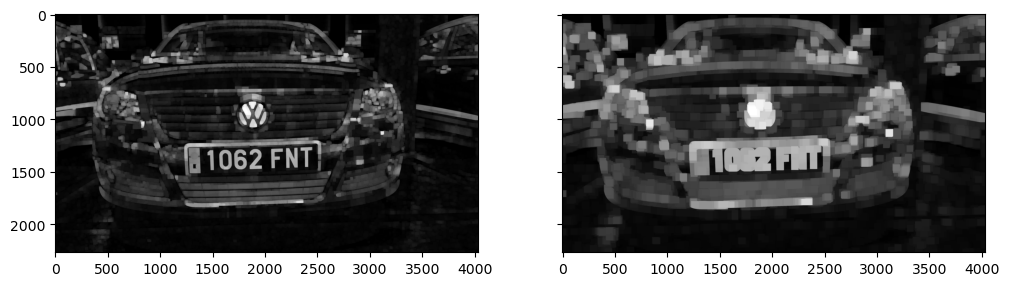

In [61]:
kernel = np.ones((5, 5), np.uint8)
super_dilated = cv2.dilate(image_dilated, kernel, iterations = 10)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(super_dilated, cmap= 'gray')

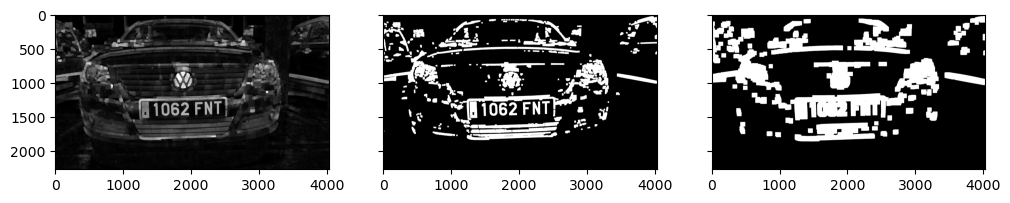

In [63]:
# BINARIZE DILATED IMAGE and SUPER-DILATED IMAGE

ret2,binary_dilated = cv2.threshold(image_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,binary_superdilated = cv2.threshold(super_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(binary_dilated, cmap= 'gray')
ax3.imshow(binary_superdilated, cmap='gray')

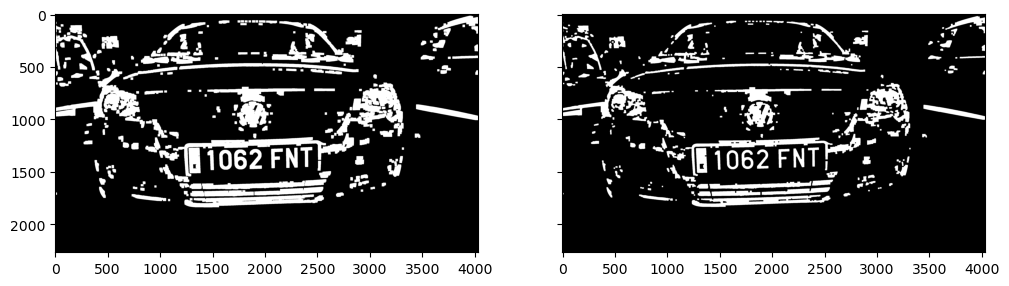

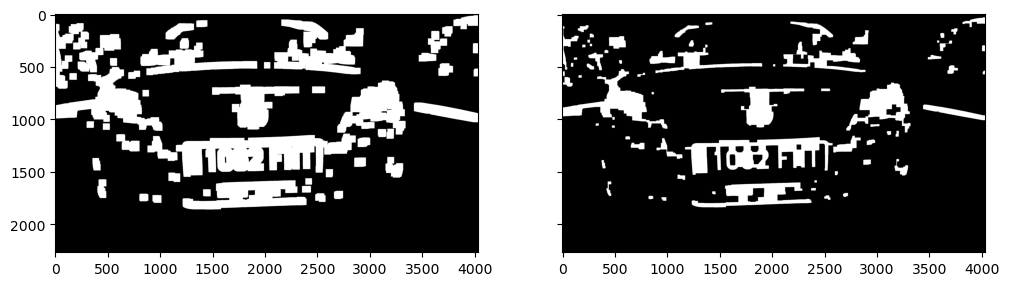

In [65]:
# trying close after erode
op1 = cv2.erode(binary_dilated, kernel, iterations = 2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_dilated, cmap= 'gray')
ax2.imshow(op1, cmap= 'gray')


op2 = cv2.erode(binary_superdilated, kernel, iterations = 10)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_superdilated, cmap= 'gray')
ax2.imshow(op2, cmap= 'gray')

#### Doing some operations with whitehat image

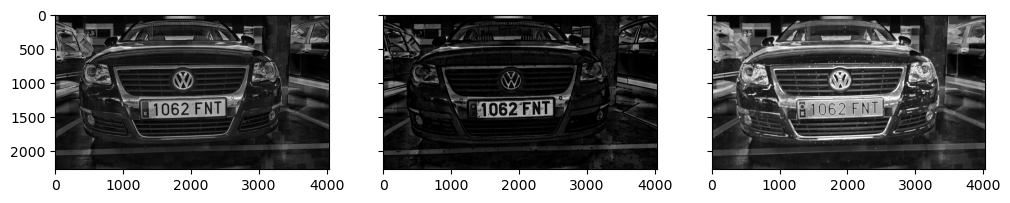

In [80]:
# Define kernel size
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

# Apply morphological operations
image_eroded = cv2.erode(whitehat_im, kernel, iterations=3)
image_dilated = cv2.dilate(whitehat_im, kernel, iterations=3)

# Display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(whitehat_im, cmap= 'gray')
ax2.imshow(image_eroded, cmap= 'gray')
ax3.imshow(image_dilated, cmap= 'gray')

##### with erode

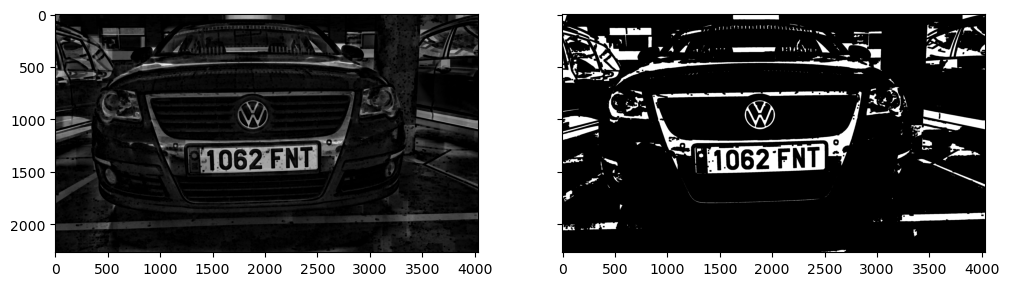

In [81]:
ret2,binary_eroded = cv2.threshold(image_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(binary_eroded, cmap= 'gray')

"ret2,binary_supereroded = cv2.threshold(super_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)\nfig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))\nax1.imshow(super_eroded, cmap= 'gray')\nax2.imshow(binary_supereroded, cmap= 'gray')"

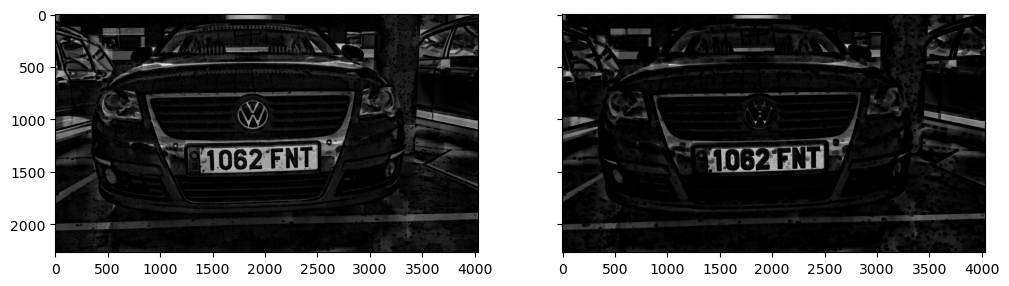

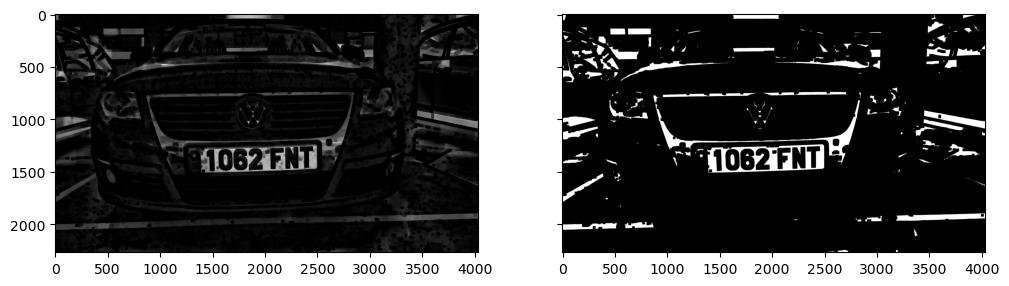

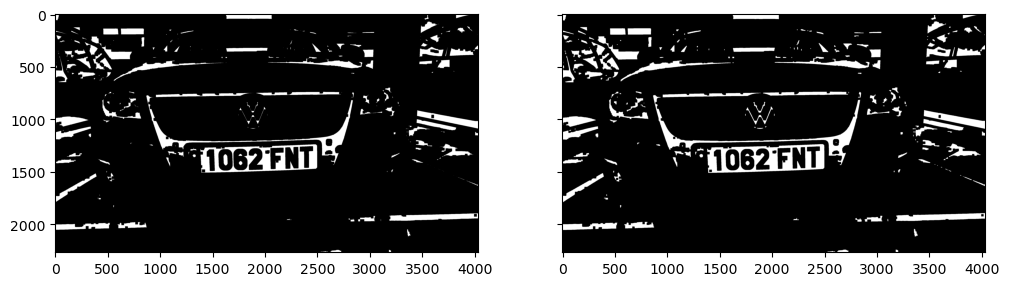

In [100]:
kernel = np.ones((5, 5), np.uint8)
super_eroded = cv2.erode(image_eroded, kernel, iterations = 3)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_eroded, cmap= 'gray')
ax2.imshow(super_eroded, cmap= 'gray')


ret2,binary_supereroded = cv2.threshold(super_eroded,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(super_eroded, cmap= 'gray')
ax2.imshow(binary_supereroded, cmap= 'gray')


kernel = np.ones((5, 5), np.uint8)
prova = cv2.dilate(binary_supereroded, kernel, iterations = 1)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(binary_supereroded, cmap= 'gray')
ax2.imshow(prova, cmap= 'gray')

##### with dilate

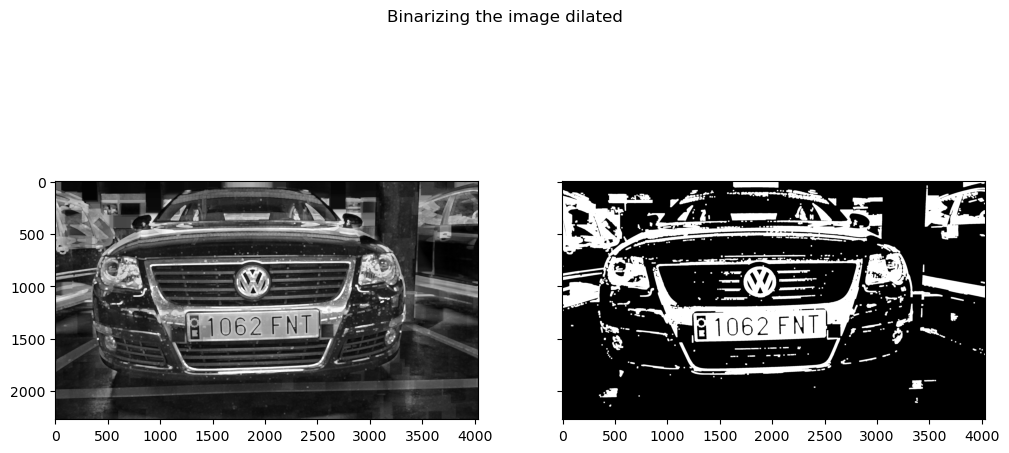

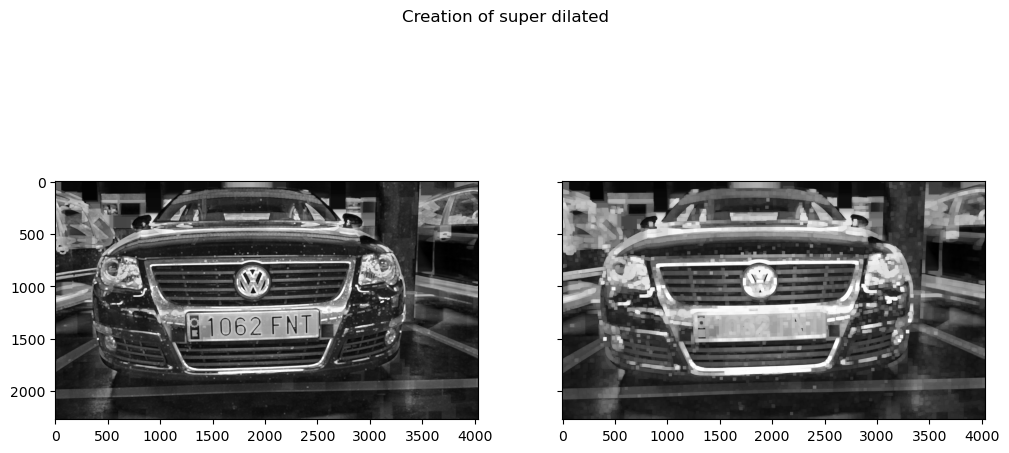

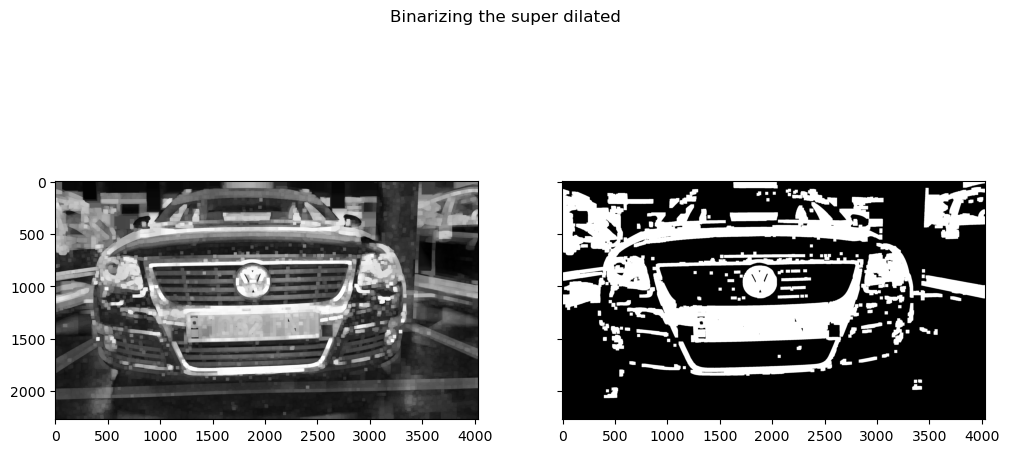

In [124]:
ret2,binary_dilated = cv2.threshold(image_dilated,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(binary_dilated, cmap= 'gray')




# CREATION OF SUPERDILATED
kernel = np.ones((5, 5), np.uint8)
super_dilated = cv2.dilate(image_dilated, kernel, iterations = 4)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(image_dilated, cmap= 'gray')
ax2.imshow(super_dilated, cmap= 'gray')

ret2,binary_superdilated = cv2.threshold(super_dilated, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(super_dilated, cmap= 'gray')
ax2.imshow(binary_superdilated, cmap= 'gray')

This is with 10 iterations on erosion


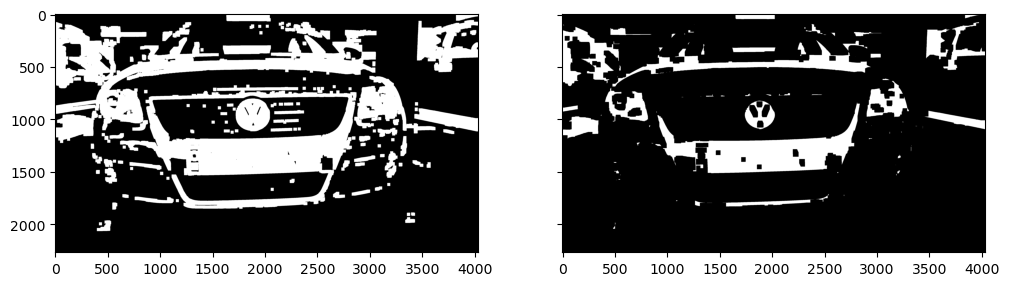

This is with 15 iterations on erosion


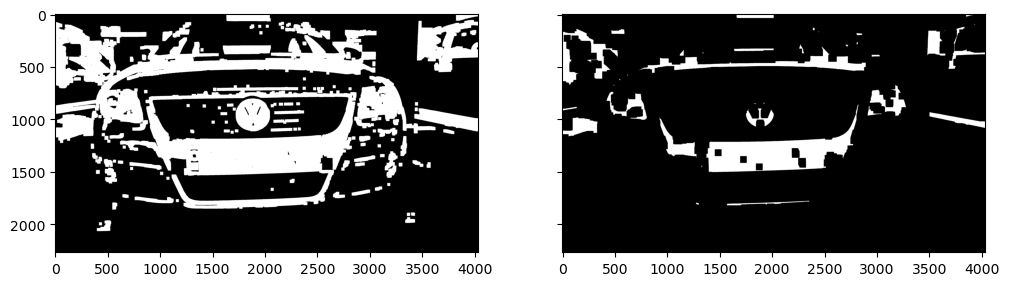

This is with 20 iterations on erosion


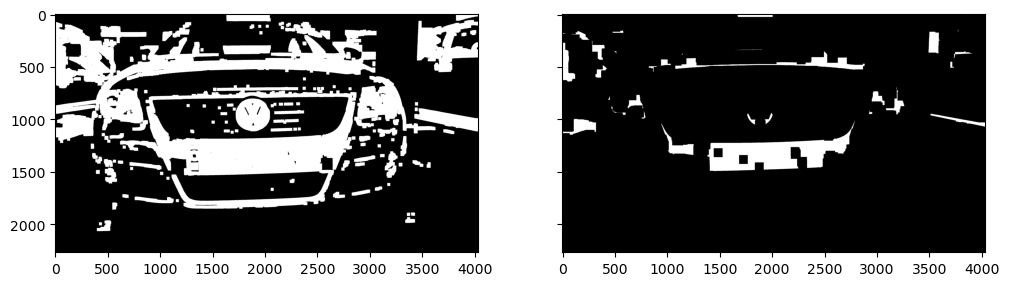

This is with 25 iterations on erosion


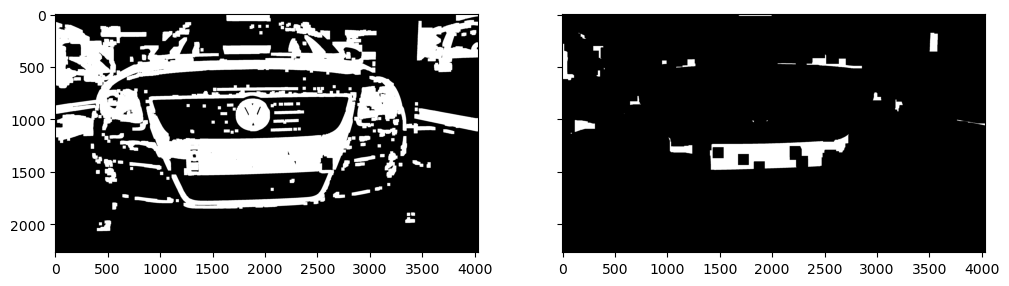

This is with 30 iterations on erosion


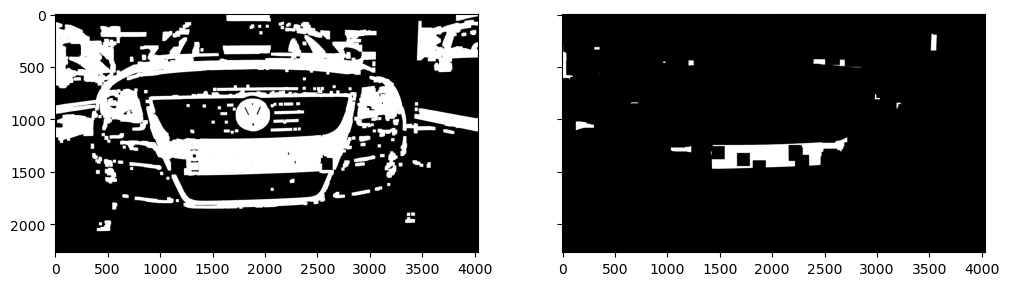

This is with 35 iterations on erosion


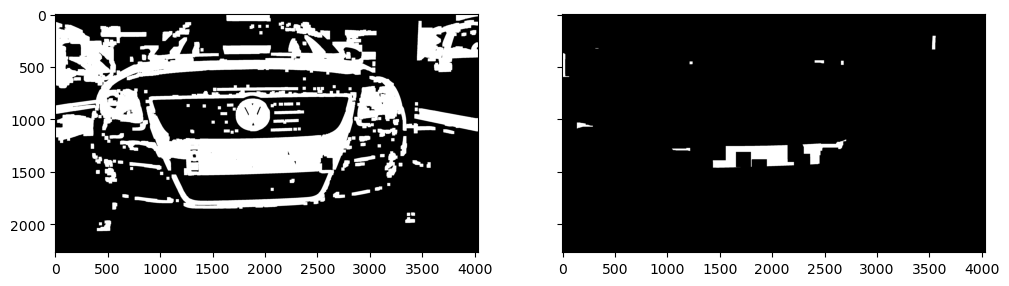

This is with 40 iterations on erosion


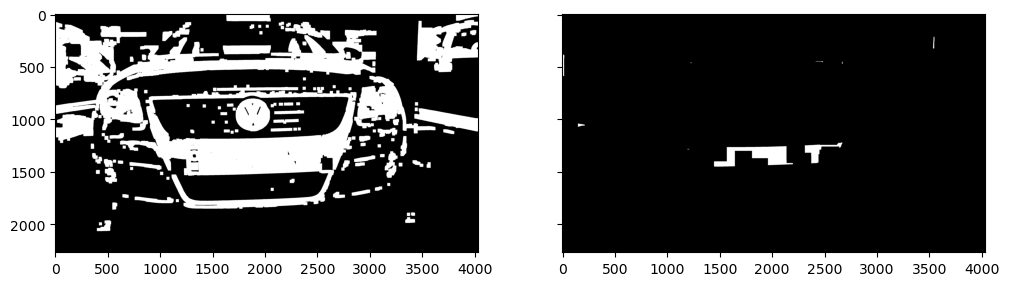

In [117]:
kernel = np.ones((5, 5), np.uint8)

for i in range(10, 45, 5):
    print(f'This is with {i} iterations on erosion')
    prova = cv2.erode(binary_superdilated, kernel, iterations = i)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 6))
    ax1.imshow(binary_superdilated, cmap= 'gray')
    ax2.imshow(prova, cmap= 'gray')
    plt.show()
    